In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:

df = pd.read_csv("Iris.csv")
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.shape

(150, 5)

In [15]:
df.describe()  

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
df.isnull().sum() 

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

<Figure size 1000x800 with 0 Axes>

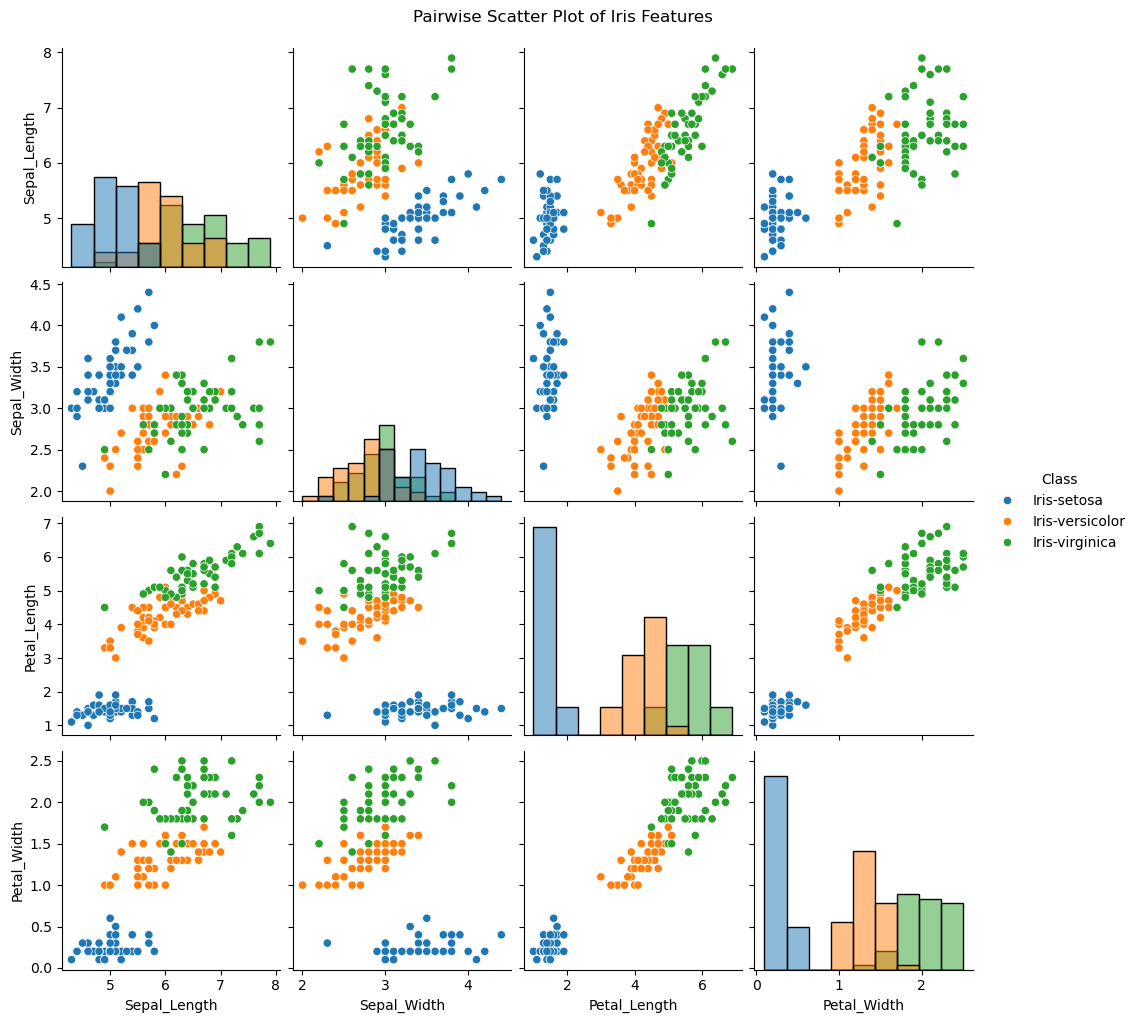

In [66]:
# 4 features and 2(width and lenghth for each) 4**2=16 scatter
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue="Class", diag_kind="hist")
plt.suptitle("Pairwise Scatter Plot of Iris Features", y=1.02)
plt.show()

In [24]:
# data.iloc[row_selection, column_selection]   :   select rows and columns by their numerical indices.
df.iloc[:, -1].value_counts()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

LabelEncoder: Converts text labels (e.g., "setosa") into numerical values (e.g., 0, 1, 2).
StandardScaler: Standardizes feature values so they have a mean of 0 and a standard deviation of 1, which helps SVM converge faster.

standardizis = (x - mean) / انحراف معیار

scaler.fit(X) would calculate the mean and standard deviation of each feature in X.
scaler.transform(X) would then apply this scaling to X to produce X_scaled.

In [27]:
# preprocess the data y
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # we have 3 kinds of Iris so 0, 1, 2

# feature scaling
scaler = StandardScaler()  # standardization(z-score normalization)
x = scaler.fit_transform(x)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Training set shape: {x_train.shape}, Testing set shape: {x_test.shape}")

Training set shape: (120, 4), Testing set shape: (30, 4)


accuracy = number of correct pred / all pred

In [32]:
# linear kernel
svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train, y_train)
y_pred_linear = svm_linear.predict(x_test) 

linear_accuracy = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy: {linear_accuracy:.4f}")

Accuracy: 0.9667


In [34]:
# polynomial kernel
svm_poly = SVC(kernel="poly")
svm_poly.fit(x_train, y_train)
y_pred_poly = svm_poly.predict(x_test)

poly_accuracy = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy: {poly_accuracy:.4f}")

Accuracy: 0.9667


In [56]:
# RBF kernel
svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(x_train, y_train)
y_pred_rbf = svm_rbf.predict(x_test)

rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy: {rbf_accuracy:.4f}")   # every sample in the test set was assigned to its correct class.

Accuracy: 1.0000


It’s very likely that the RBF kernel has achieved perfect accuracy because the dataset is small, simple, and well-separated, so the model can easily learn to classify each sample correctly.

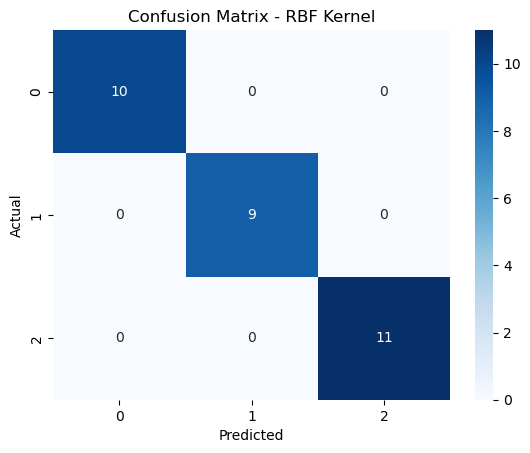

In [58]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)

sns.heatmap(cm, cmap="Blues" , annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RBF Kernel")
plt.show()

# Print classification report
#print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

We split the dataset into k=5 number of subsets (folds)
then we perform training on the all the subsets but leave one(k-1=4) subset for the evaluation of the trained model.
In this method, we iterate k=5 times with a different subset to see the accuracy of our RBF kernel.

In [52]:
# Perform 5-fold cross-validation on the RBF kernel SVM
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale")
scores = cross_val_score(svm_rbf, x, y, cv=5, scoring="accuracy")

print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean Accuracy: 0.9667
Standard Deviation: 0.0211
